### Wine dataset - RandomForest Model ###

In [539]:
from sklearn import datasets
import numpy as np
import pandas as pd

red_wine_data = pd.read_csv("winequality-red.csv")
white_wine_data = pd.read_csv("winequality-white.csv")

red_wine_data['type'] = 'red'
white_wine_data['type'] = 'white'

wine_data = pd.concat([red_wine_data, white_wine_data], ignore_index=True).sample(frac=1)
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
5378,6.5,0.320,0.45,7.7,0.022,31.0,97.0,0.99134,3.20,0.70,12.70,7,white
4060,8.2,0.260,0.33,2.6,0.053,11.0,71.0,0.99402,2.89,0.49,9.50,5,white
3731,7.1,0.220,0.32,16.9,0.056,49.0,158.0,0.99980,3.37,0.38,9.60,6,white
6319,6.6,0.270,0.32,1.3,0.044,18.0,93.0,0.99044,3.11,0.56,12.25,5,white
6386,3.9,0.225,0.40,4.2,0.030,29.0,118.0,0.98900,3.57,0.36,12.80,8,white


Dividing the data to dependent (x) and independent (y)

In [540]:
from sklearn.model_selection import train_test_split
x = wine_data.drop(['type'], axis=1)
y = wine_data[['type']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Importing the RandomForest classifier and training

In [541]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

C:\Users\Daniel\AppData\Local\Temp/ipykernel_16680/3627081326.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train,y_train)


A function to check the median accuracy of the classifier

In [542]:
import statistics
def MedianAccuracy():
    MyList = []
    for i in range (1,31):  
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
        clf=RandomForestClassifier(n_estimators=100)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        MyList.append(metrics.accuracy_score(y_test, y_pred))
       
       
    print(statistics.median(MyList))

Printing the accuracy of the classifier

In [543]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9938461538461538


Fidining the impact of each feature on the prediction

In [544]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

features = ['fixed acidity' ,	'volatile acidity',	'citric acid'	,'residual sugar'	,'chlorides'	,'free sulfur dioxide'	,'total sulfur dioxide'	,'density'	,'pH'	,'sulphates'	,'alcohol'	,'quality']
feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)
feature_imp

C:\Users\Daniel\AppData\Local\Temp/ipykernel_16680/2946288720.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train,y_train)


total sulfur dioxide    0.310747
chlorides               0.248320
volatile acidity        0.110677
free sulfur dioxide     0.065732
density                 0.063992
fixed acidity           0.052745
sulphates               0.052454
residual sugar          0.040891
pH                      0.021948
citric acid             0.020044
alcohol                 0.009677
quality                 0.002773
dtype: float64

Visualizing the impact of each feature on the prediction

No handles with labels found to put in legend.


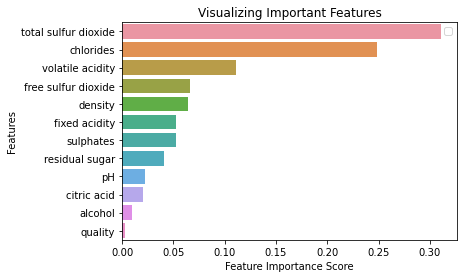

In [545]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Conclusion - Since quality is not an important feature, as it's importantance is very low, we can remove it to reduce the training time

In [546]:
x = wine_data[['fixed acidity' ,	'volatile acidity',	'citric acid'	,'residual sugar'	,'chlorides'	,'free sulfur dioxide'	,'total sulfur dioxide'	,'density'	,'pH'	,'sulphates'	,'alcohol'	]]
y = wine_data['type']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9933333333333333
